In [1]:
import pandas as pd
prices = pd.read_csv("prices_full_processed.csv")
prices.head()

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/297115488.py:2: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  prices = pd.read_csv("prices_full_processed.csv")


,file_id,chainid,subchainid,storeid,itemcode,itemname,manufacturername,manufacturecountry,manufactureritemdescription,unitqty,...,qtyinpackage,itemprice,unitofmeasureprice,allowdiscount,itemstatus,priceupdatedate,clean_itemname,processed_itemname,unitqty_extracted_number,unitofmeasure_extracted_number
0,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,7290010117970,סבבה בוטנים אמריקאים 50 גרם,כללי,not-provided,בוטנים אמריקאים,NaN,...,1.0,1.7,0.0,True,False,2018-02-28,"['סבבה', 'בוטנים', 'אמריקאים', '50', 'גרמים']",סבבה בוטנים אמריקאים 50 גרמים,NaN,NaN
1,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,7290000178707,תפוצ`יפס 50גרם,כללי,not-provided,צ'יפס בטעם טבעי,NaN,...,1.0,3.9,0.0,True,False,2021-01-27,"['תפוציפס', '50', 'גרמים']",תפוציפס 50 גרמים,NaN,NaN
2,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,7290000288413,סנו די רול און 50,כללי,not-provided,כדורית רול און,NaN,...,1.0,14.9,0.0,True,False,2020-04-16,"['סנו', 'די', 'רול', 'און', '50']",סנו די רול און 50,NaN,NaN
3,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,7290000288420,סנו די תרסיס,כללי,not-provided,תרסיס דוחה יתושים למספר שעות,NaN,...,1.0,14.9,0.0,True,False,2021-04-22,"['סנו', 'די', 'תרסיס']",סנו די תרסיס,NaN,NaN
4,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,7290000146997,טום וג'רי משחת שיניים בטעם מסטיק 50 מל,כללי,not-provided,משחת שיניים בטעם מסטיק,מיליליטרים,...,1.0,7.9,0.0,True,False,2020-06-04,"['טום', 'וגרי', 'משחת', 'שיניים', 'בטעם', 'מסט...",טום וגרי משחת שיניים בטעם מסטיק 50 מיליליטרים,NaN,NaN


In [4]:
import pickle
with open('all_measure_names.pkl','rb') as pkl:
    all_names = pickle.load(pkl)
all_names

['גרמים',
 'מיליליטרים',
 'קילוגרם',
 'ליטרים',
 'יחידה',
 'מארז',
 'סנטימטר',
 'מטרים',
 'מטרבוע',
 'מילימטר',
 'קוב',
 'אורך',
 'סנטימטרמעוקב']

# Symbolic Regression 

In [14]:
import math
def find_measures(x):
    if isinstance(x,float) and math.isnan(x):
        return []
    extracted = []
    splited_name = x.split(" ")
    for index,word in enumerate(splited_name):
        if index == 0:
            continue 
        
        if word in all_names:
            assumed_numbric = splited_name[index-1]
            try:
                float(assumed_numbric)
                extracted.append(assumed_numbric)
            except ValueError:
                pass
    return extracted

prices['numbers_in_itemname'] = prices.processed_itemname.apply(find_measures)
prices['numbers_in_itemname']

0          [50]
1          [50]
2            []
3            []
4          [50]
           ... 
1485007      []
1485008      []
1485009      []
1485010      []
1485011      []
Name: numbers_in_itemname, Length: 1485012, dtype: object

In [15]:
max_number_of_measures = prices['numbers_in_itemname'].apply(len).max()
max_number_of_measures

4

In [16]:
extracted_measure = pd.DataFrame(index=prices.index,data=prices['numbers_in_itemname'].to_list(),columns=list(map(lambda x:f"{x}_extracted_measure",range(max_number_of_measures)))).fillna(0).astype(float)
extracted_measure

,0_extracted_measure,1_extracted_measure,2_extracted_measure,3_extracted_measure
0,50.0,0.0,0.0,0.0
1,50.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,50.0,0.0,0.0,0.0
...,...,...,...,...
1485007,0.0,0.0,0.0,0.0
1485008,0.0,0.0,0.0,0.0
1485009,0.0,0.0,0.0,0.0
1485010,0.0,0.0,0.0,0.0


In [17]:
prices_with_additionl_features = prices.join(extracted_measure)
prices_with_additionl_features['chain'] = prices_with_additionl_features.file_id.apply(lambda x:x.split("/")[1])

In [18]:
categorial = ['unitqty','unitofmeasure','chain']
numbric =  ["quantity","unitofmeasureprice","qtyinpackage",'unitofmeasure_extracted_number','unitqty_extracted_number','0_extracted_measure','1_extracted_measure','2_extracted_measure','3_extracted_measure']
target = 'itemprice'

In [19]:
prices_with_additionl_features = prices_with_additionl_features.drop_duplicates(subset=['chain','itemcode'])

In [20]:
from gplearn.genetic import SymbolicRegressor

numbric_zero_pad =  ['0_extracted_measure','1_extracted_measure','2_extracted_measure','3_extracted_measure',"quantity","unitofmeasureprice","qtyinpackage",'unitofmeasure_extracted_number','unitqty_extracted_number']
numbric_one_pad =  []


models = {}
for chain in prices_with_additionl_features.chain.unique():
    print(f" looking at {chain}")
    #
    current_chain = prices_with_additionl_features[prices_with_additionl_features.chain == chain]
    #
    x = current_chain[numbric]
    x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)
    x[numbric_one_pad] = x[numbric_one_pad].fillna(1)
    
    y = current_chain[target]
    

    est_gp = SymbolicRegressor(population_size=5000,
                               generations=20, stopping_criteria=0.01,
                               p_crossover=0.7, p_subtree_mutation=0.1,
                               p_hoist_mutation=0.05, p_point_mutation=0.1,
                               max_samples=0.9, verbose=1,
                               parsimony_coefficient=0.01, random_state=0,
                               n_jobs=-1,
                               feature_names=numbric,
                               const_range=(1.0, 1.0),)
    est_gp.fit(x, y)
    
    models[chain] = est_gp

# save
import pickle
file = open('models.pkl', 'wb')
pickle.dump(models, file)
file.close()

 looking at Super-Pharm
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      1.49523e+09       15          52.0496          56.4802      1.74m
   1    11.24          247.611       31          50.6758           60.791      1.28m
   2    13.65           109310       31          49.7979           45.438      1.72m
   3    17.55          260.769       31          48.6195          48.7597      2.38m
   4    23.71          378.167       31          47.6136          56.5254      1.84m
   5    28.72           93.297       39          47.0304           56.081      1.49m
   6    35.80           114.82       73          43.5915          38.3044      1.52m
   7    43.95          306.565       75          42.5739          47.5965      1.57m
   8    53.73          429.306       77          42.4958          46.2319      1.51m
   9    64.21           115.41       75          41.9599          54.1413      1.61m
  10    73.82          523.785       71          41.8738           54.339      1.43m
  11    78.04      2.71689e+08       77          41.5989         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      1.26181e+21       15         0.541963         0.977643     26.24s
   1    10.39           3394.3        5         0.502164          1.33574      1.59m
   2    10.35           117339        5         0.502059          1.33668      1.63m
   3     4.27           389727        3          0.47114          1.61488      1.48m
   4     3.31           102711        3         0.473549           1.5932      1.28m
   5     3.33          24867.6        3         0.469275          1.63166      1.17m
   6     3.27          8273.59        3         0.470555          1.62014      1.08m
   7     3.31          21772.6        3          0.48531          1.48738      1.01m
   8     3.26           204086        3         0.459573          1.71895     54.34s
   9     3.27          7105.31        3         0.474963          1.58048     49.89s
  10     3.19          2032.99        3         0.462659          1.69119     45.90s
  11     3.27      6.71647e+08        3         0.461547         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      1.94411e+12        3          4.50818           5.8614     34.78s
   1    11.68          4848.87        5          4.53665          5.60533      1.41m
   2    13.55      3.20471e+07        9          4.40154          4.83137      1.54m
   3     4.44          77688.2        9           4.3895          4.93963      1.46m
   4     3.74          23946.4       11          4.30803          5.76672      1.35m
   5     4.88          15019.8       15           4.1846          4.84393      1.30m
   6     8.51          4870.27       19          3.97047          4.88529      1.24m
   7    12.03          15656.6       37          3.62256          4.46706      1.19m
   8    16.45           179440       45          3.21746          3.42629      1.15m
   9    24.02          1399.64       67          2.99266          2.56432      1.14m
  10    33.04           564.26       73          2.78208          3.94616      1.13m
  11    44.43      8.78092e+12       67          2.74749         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      2.94806e+12        5                0                0     21.02s
 looking at Tiv Taam
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      3.26711e+19       15          15.0884          14.2874     41.46s
   1    10.22           355579        7           0.8519          1.13336      1.78m
   2    25.94           144645        7          0.85168          1.13534      1.79m
   3    42.67           397810       17         0.503073         0.325504      1.91m
   4    37.00      2.48386e+07       21         0.445649         0.856079      1.98m
   5    25.19          14107.4       15         0.449378         0.743689      1.75m
   6     9.84          77719.2       17         0.421249          1.05714      1.44m
   7    10.33      3.18566e+06        7         0.144835         0.149045      1.20m
   8    14.27      2.60114e+06        7         0.144528         0.151809      1.12m
   9    14.69          43754.3       23        0.0200539        0.0221105      1.09m
  10    15.25          18827.8       17       0.00662345        0.0116249     58.56s
 looking at Shufersal
    |   Population Average    |            

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      3.54863e+16        7          12.0159          30.2267     33.62s
   1    10.23          9432.85        5         0.688708         0.651607      1.62m
   2     6.72          15360.5        7         0.666704         0.849552      1.58m
   3     6.42           253441       13         0.641118          1.07972      1.55m
   4     7.06           503289        5         0.626135          1.21451      1.43m
   5     5.58          25766.6        5         0.637862          1.10901      1.35m
   6     5.15      4.53415e+07        5          0.63997          1.09005      1.62m
   7     5.22           477649        5         0.641139          1.07953      1.11m
   8     5.09      1.32932e+06        5         0.633956          1.14415      1.00m
   9     5.17          7366.11        5         0.638695          1.10152     55.52s
  10     5.07          10241.2        5         0.622388          1.24822     49.73s
  11     5.14      5.25397e+12        5         0.629769         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26       9.8933e+19        7        0.0331079        0.0477072     25.33s
   1     9.66           849225       19         0.032118        0.0566138      1.47m
   2     4.13          5246.22        3        0.0321964        0.0559083      1.49m
   3     1.51      7.16363e+15        1         0.031971        0.0579365      1.37m
   4     1.41          1218.29        1         0.031873        0.0588183      1.24m
   5     1.52           376155        1        0.0319318        0.0582892      1.17m
   6     1.45          9270.41        1        0.0316966        0.0604056      1.09m
   7     1.48          5726.96        1        0.0322552        0.0553792      1.00m
   8     1.43           8662.5        1        0.0318142        0.0593474     56.18s
   9     1.44           356978        1        0.0318828        0.0587302     49.41s
  10     1.36           1175.4        1        0.0317652        0.0597884     45.54s
  11     1.42      6.23541e+13        1         0.031824        0

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26       4.9694e+14       31          14.3654          15.7575     23.54s
   1    10.15          5382.76        5          10.6252          10.3263      2.02m
   2    12.11           328757       11           10.541          12.2718      1.47m
   3    18.53           8172.1       11           10.226          9.41266      1.47m
   4    16.52          24076.3       29          9.80135          10.9029      1.51m
   5    14.72          7838.93       21          9.30085          9.50268      1.40m
   6    15.67          2261.26       53          9.17652          9.14785      1.30m
   7    19.96          4318.49       53          8.98955          10.8304      1.24m
   8    24.88           227055       53           8.9854          9.69743      1.19m
   9    27.72          3716.02       71          7.49753          7.60093      1.13m
  10    25.04          16443.1       87          7.40117          7.73039      1.08m
  11    30.23      1.04385e+10       93          7.27004         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      3.19315e+17       31          11.2186          11.1864     19.90s
   1    10.27          35777.9       11          10.0511           9.6766      1.51m
   2    10.24            66544       39          9.79333          10.1099      1.58m
   3    20.15          6813.75       33          8.63718          9.44185      1.50m
   4    21.92           532887       49          7.75459          7.83417      1.52m
   5    28.28          25545.9       31          7.57244          9.03135      1.49m
   6    35.99          27555.3       59          7.55419          9.28602      1.44m
   7    40.50          32018.6       57          7.53649          9.35145      1.43m
   8    35.24      1.45931e+06       49          7.45546          7.93982      1.40m
   9    31.33          1318.29       49          7.43493          8.12752      1.20m
  10    28.24          667.327       39          7.45484          8.05717      1.05m
  11    26.80      2.92053e+09       35          7.38145         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      4.50661e+10        3          12.0207           21.323     18.01s
   1    11.00           182300        5          5.57486          5.24995      1.56m
   2     9.37          16671.2        5          4.78231          12.3736      1.54m
   3    15.79           113300       15           3.8353          12.9253      1.51m
   4    17.94           281604       15           4.0802          10.7242      1.44m
   5    12.49          2398.11       13          3.88647          10.9907      1.41m
   6    11.65          1711.79       13          3.76481          12.0754      1.39m
   7    16.03           3529.3       11          3.61279          14.1881      1.18m
   8    17.51          4440.95       17          3.69326            12.77      1.13m
   9    17.86          812.912       19          3.56611          13.9122      1.46m
  10    16.95          525.796       15          3.55126          13.0661     53.54s
  11    15.80           220.79       11          3.68437         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      1.01189e+11        7      0.000860585       0.00425806     23.76s
 looking at King Store
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      1.25152e+13        5                0                0     34.53s
 looking at cofix
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      6.91546e+15        5          109.161           148.75     21.95s
   1    11.48          24512.8        3          107.145          166.875      1.33m
   2    11.57           779509        3          107.488          163.793      1.50m
   3    11.18      1.21011e+06        5          106.901          170.045      1.48m
   4     8.47      2.49715e+09        5          106.382          174.716      1.40m
   5     7.35      1.69588e+07        5          105.498          182.666      1.26m
   6     5.90      1.01675e+09        3          106.266          174.777      1.16m
   7     5.57      6.95165e+08        3           105.54          181.303      1.08m
   8     5.24      1.68968e+07        3          106.241          175.003     58.57s
   9     4.77          65291.1        3          106.483          172.828     52.38s
  10     4.58          64389.5        3          106.195          175.421     47.82s
  11     4.65      3.67974e+10        3          106.184         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      3.85097e+15       15          15.3003          15.0546     47.02s
   1     9.55           245823       15          15.1421          16.4778      1.41m
   2     7.44            23506       15           2.1416          2.74794      1.53m
   3    12.27          8628.28       19          1.77576          2.30222      1.53m
   4    17.20      1.81158e+07       13          1.59882          2.05078      1.54m
   5    18.37          29527.1       13          1.62169            1.845      1.54m
   6    16.97            35473       17           1.5289          1.86171      1.45m
   7    14.28          1873.21       17          1.55195           1.6544      1.31m
   8    13.46            13993       13          1.56184          2.38345      1.19m
   9    12.36          10987.8       13          1.55241          2.46829      1.08m
  10    11.15          4183.62       11          1.56432          2.36115     57.00s
  11    10.14          4989.96       15          1.54755         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      7.04655e+16        3         0.588253         0.934073     20.63s
   1     7.76          8195.38        3         0.571248           1.0871      1.33m
   2     8.76           143641        3         0.532388           1.4368      1.46m
   3     4.13      4.40138e+07        3         0.537267          1.39289      1.36m
   4     3.29          1108.37        3         0.539484          1.37294      1.26m
   5     3.33          2516.76        3         0.541018          1.35914      1.16m
   6     3.26           1754.6        3         0.531497          1.44482      1.08m
   7     3.31            30630        3         0.544369          1.32898      1.03m
   8     3.25          51526.8        3         0.530931          1.44991     56.46s
   9     3.27          1453.29        3         0.531797          1.44212     50.14s
  10     3.19          149.135        3         0.536732          1.39771     45.83s
  11     3.27      9.97639e+09        3         0.540197         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      1.57897e+17        3         0.120925         0.152066     20.38s
   1    10.81      1.14063e+07        5         0.101981         0.322566      1.29m
   2    11.12      5.77678e+06        3         0.105637         0.289658      1.42m
   3     4.09           272617        3        0.0966301         0.370721      1.39m
   4     3.26          52161.9        3        0.0981949         0.356638      1.27m
   5     3.32          7871.32        3        0.0993023         0.346671      1.16m
   6     3.26           109583        3        0.0961408         0.375125      1.09m
   7     3.31          18622.2        3        0.0977663         0.360496      1.01m
   8     3.25      3.39168e+06        3         0.100802         0.333177     58.01s
   9     3.27          6165.65        3        0.0998403         0.341829     52.66s
  10     3.19          2421.04        3         0.099353         0.346215     46.86s
  11     3.27      6.70757e+11        3        0.0939103         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      4.21877e+20       31          15.8909          17.8267     46.70s
   1    10.79          10078.8       11          15.6582          15.9856      2.42m
   2    10.31      1.10625e+09       31          15.3626          16.4229      1.53m
   3    20.64          9533.21       33          14.0575            13.44      1.64m
   4    24.65          34610.6       45          13.1688          13.3717      1.70m
   5    29.73          3557.18       43          12.8137          14.6202      1.63m
   6    37.53          2706.26       65          12.7116          12.8987      1.68m
   7    39.88          6218.65       67          12.5643          14.2239      1.64m
   8    36.57          11253.2       67           12.562          14.2448      1.50m
   9    34.22          3549.88       51          12.5617          13.2722      1.40m
  10    32.35          1827.93       51           12.419          14.5964      1.23m
  11    33.68      4.10761e+14       59          12.3596         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      3.02837e+10        7        0.0375072          0.12513     19.26s
   1    11.57          836.159        3        0.0366436         0.132902      1.55m
   2     3.50          6142.28        3        0.0364277         0.134845      1.49m
   3     1.48          629.821        1        0.0366436         0.132902      1.40m
   4     1.41          119.951        1        0.0362982          0.13601      1.28m
   5     1.52          112.899        1        0.0353483          0.14456      1.17m
   6     1.45          328.412        1        0.0356937         0.141451      1.03m
   7     1.48          333.305        1         0.036255         0.136399     57.43s
   8     1.43          3362.59        1        0.0361255         0.137565     52.85s
   9     1.44          24688.9        1        0.0362982          0.13601     47.96s
  10     1.36          125.635        1        0.0366436         0.132902     43.55s
  11     1.42      3.24251e+11        1        0.0363846         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      2.52348e+14       31          8.33352          8.50437     19.26s
   1    11.02          879.407       31          8.05441          8.77561      1.28m
   2     8.17          34914.1       25          7.95755          8.80194      1.44m
   3    12.78          22771.7       33          7.73584          8.13451      1.39m
   4    16.89          6166.32       21          7.53496          8.00995      1.39m
   5    17.26          642.702       31          6.72626          6.73984      1.37m
   6    19.17          6602.18       51          6.11544          5.99323      2.10m
   7    29.16          6440.91       41          5.83791          6.24837      1.23m
   8    36.57          5856.52       57          5.55277          5.60139      1.28m
   9    39.09          1723.61       37          5.32711          5.64587      1.19m
  10    38.84          442.751       31          4.54949          4.47986      1.11m
  11    38.37      1.30952e+14       31          4.51435         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      3.41518e+14        3          3.32839          4.56508     16.05s
   1    11.88          13472.8        7          3.12716          6.37446      1.34m
   2    13.54           551517        3          2.93233          8.12619      1.46m
   3     5.65          70096.9        3           2.9241          8.20019      1.35m
   4     4.03          15548.5        3            2.973          7.76057      1.26m
   5     3.73          6719.07        3          2.93628          8.09069      1.18m
   6     3.43          18857.8        3          2.97787          7.71677      1.11m
   7     3.40          16240.1        3           3.0224          7.31634      1.02m
   8     3.30           291444        3          2.97884          7.70799     54.84s
   9     3.29          5914.01        3          2.93059           8.1418     49.08s
  10     3.20          1702.91        3          2.98248          7.67532     44.80s
  11     3.27      2.11814e+10        3          3.02237         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      1.10341e+14        5                0                0     20.73s
 looking at mega-market
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      1.04777e+15        3          3.15285          4.57052     26.83s
   1    11.41          4289.21        5          3.08286          5.20005      1.56m
   2    12.78           418817        7          3.07759          5.33234      1.56m
   3     4.98          61138.4        3          2.98056          6.12017      1.45m
   4     3.66          14048.3        5          2.96314          6.27682      1.33m
   5     3.52           198346        3          2.98113          6.11501      1.23m
   6     3.37          23795.2        3          3.01396          5.81972      1.10m
   7     3.42          19906.6        3          3.00252          5.92263      1.06m
   8     3.32           649522        3          3.01875          5.77668     58.33s
   9     3.32           5337.8        3          3.01414          5.81811     52.72s
  10     3.22          1222.54        3          3.01015            5.854     47.95s
  11     3.28      1.16936e+10        3          2.94852         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      2.49373e+18       63          8.07997          8.36253     40.37s
   1     9.99          1690.29       63          7.96083          8.15803      1.71m
   2     7.57            10666       13          7.93346          8.22668      1.56m
   3     7.26          10346.9       13          7.85742          8.38491      1.47m
   4     9.27      2.78813e+06       13          7.83374          8.57277      1.41m
   5    10.92          1532.86       11          7.79361          8.93394      1.35m
   6    10.83          1805.86       11          7.81869          8.70819      1.31m
   7    10.92           1415.8       11          7.82108          8.68674      1.21m
   8    10.76          399.144       17          7.76937           8.5462      1.11m
   9    10.83          305.326       23          7.74819          8.02674      1.02m
  10    10.77          449.864       23           7.7535          7.97892     54.95s
  11    10.79      3.67624e+13       23          7.76409         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26       8.7515e+10       15          32.5254          30.3788     16.00s
   1     9.17           702027       13          28.8289          37.0983      1.36m
   2    13.88       3.4712e+06       11          28.1245          35.2095      1.41m
   3    22.88          504.085       15          27.8332          38.1022      1.45m
   4    18.15          544.731       13          27.1693          43.7917      1.47m
   5    14.70          478.049       13          27.0913          35.7316      1.37m
   6    14.01          778.577       39          26.9909          35.5201      1.31m
   7    14.71          428.996       17          26.6757          39.4658      1.23m
   8    16.84          2056.09       41           25.806          38.0748      1.93m
   9    21.96          1381.68       39          25.6067          41.1633      1.01m
  10    28.72          453.508       83          25.5719          33.3323     57.39s
  11    36.23          582.369       59          25.3338         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26       3.5661e+17        7          14.1627          25.8232     19.66s
   1     9.74          36349.9        5          6.72856          7.67201      1.30m
   2     8.21          42951.4       13          6.65688            8.317      1.41m
   3     9.90          64998.1        5          6.69423           7.9809      1.37m
   4    12.24      1.65981e+10       13          6.46878          7.64751      2.43m
   5     9.19           118037       15          6.29235          6.43062      1.31m
   6     6.61           279395       15          6.08765          8.43036      1.17m
   7     8.23          92550.6       21          5.88784          6.88249      1.11m
   8    11.86           227210       17          5.51371          6.35128      1.04m
   9    14.01          71941.6       37          5.17211            5.246      1.04m
  10    15.49          10768.8       33          5.09908           6.1062     59.47s
  11    19.71       4.9628e+11       33          4.62585         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      1.46103e+16        9          12.7949          31.1802     23.62s
   1     8.01          43030.8        7          10.7787          10.6842      1.53m
   2     7.09          81710.3        7           10.613          12.1752      1.50m
   3     7.81          57083.4        9          10.0832          10.3894      1.40m
   4     9.64           168149       11          9.71947          11.6021      1.36m
   5     9.96          555.534       11          9.72776          11.5275      1.35m
   6    12.48          531.778       23          9.45752          12.0291      1.25m
   7    15.49          12801.7       35           9.4446          12.1623      1.19m
   8    17.51            52246       41          9.39283          12.7363      1.17m
   9    18.34           174136       15          9.39892          12.6431      1.90m
  10    17.39          71.0097       19          9.33106           13.366     57.38s
  11    16.66          75.1741       39          9.26949         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      6.28981e+16        3          4.03759          4.93783     34.01s
   1    10.47          3903.02       11          4.01375          5.15224      1.54m
   2    12.36          8109.56       17          3.95251          4.13162      1.59m
   3     4.60           156269       17          3.90841          4.52835      1.52m
   4     3.43          45324.1       17          3.93637          4.27681      1.42m
   5     3.41          4448.48       17          3.87666          4.84861      1.34m
   6     3.45          54393.8       15          3.89968          4.60685      1.17m
   7     3.69          40541.7       15          3.87395          4.83824      1.05m
   8     3.92           131848       11          3.87237          4.85088     59.98s
   9     4.85          6444.81       19          3.80763          3.86681     54.74s
  10     7.84          30114.7       23          3.71195          4.72579     50.10s
  11    11.43      1.09236e+07       25          3.59725         

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/1848783654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numbric_zero_pad] = x[numbric_zero_pad].fillna(0)


   0    27.26      4.06543e+17        5          12.9869           12.557     44.44s
   1    10.34          38510.2       35          10.9857          10.8432      1.55m
   2     8.01      8.92283e+09       13          4.52174          4.42075      1.60m
   3    10.27            23329       13          4.44261          5.13259      1.57m
   4    15.44           156235       13          4.44928          5.07252      1.50m
   5    20.77          7839.41       11           4.3949          5.56175      1.61m
   6    17.72          18065.7       13          4.31811          6.25259      1.51m
   7    12.71          14520.7       19          4.30742           6.3487      1.39m
   8     9.71      1.06339e+06       13          4.32348          6.20424      1.16m
   9     8.29          24324.5        7          4.35372          5.93223      1.02m
  10     7.16          2865.09        7          4.34302          6.02842     52.32s
  11     6.62      3.76083e+11        7          4.31699         

In [21]:
file = open('models.pkl', 'rb')
models = pickle.load(file)
file.close()

In [76]:
score_model_chain_matrix = {}
for chain_model in models:
    
    score_model_chain_matrix[chain_model] = []
    
    for chain_name in models:
    
        current_chain = prices_with_additionl_features[prices_with_additionl_features.chain == chain_name]
        #
        x = current_chain[numbric].fillna(0)
        y = current_chain[target]
        
        score_model_chain_matrix[chain_model].append(
            models[chain_model].score(x,y)
        )

In [84]:
# this should be a confusion matrix, 
# check if their is better model for a given chain
score_model_chain_matrix


{'Super-Pharm': [-0.02677020036209865,
  -3.574709048240213,
  -0.6786377162104555,
  -17609413.764491633,
  -84.08683780180657,
  -23.534595830534016,
  -3220061.2730446337,
  -13.326389391744199,
  -8.021063596226636,
  -0.19715099158459504,
  -2131419.5408350728,
  -2946.7583349456168,
  0.03540132375972893,
  -2309238.4786692658,
  -22652.687902593247,
  -2.589470501115353,
  -0.00956969212751635,
  -22720888.082100786,
  -2080.3732768524924,
  -1.0757348495135606,
  -431.7638629302268,
  -1.2717724166814075,
  0.1628883783447833,
  -1.2061102409425972,
  -23.730986731598833,
  -60.42437745960821,
  -1.5612369062005511,
  -78.97809890652678],
 'Rami Levy': [-11.682817911141191,
  0.82993617773809,
  0.46874892678647495,
  1.0,
  -4307.182805204018,
  -7774.324986691854,
  0.9999080303680806,
  -1489.3465146415194,
  -3526.9451669516047,
  -837.5626800213349,
  0.9999999040305408,
  1.0,
  0.04503065861721267,
  -8827.87463100545,
  0.866522464804017,
  0.9912753702384638,
  -776.46

In [85]:
import graphviz

models_to_improve = []
for chain_model in models:
    
    current_chain = prices_with_additionl_features[prices_with_additionl_features.chain == chain_model]
    #
    x = current_chain[numbric].fillna(0)
    y = current_chain[target]
    score = models[chain_model].score(x,y)
    
    if score > 0.8 and models[chain_model]._program._length() < x.shape[1]:
        print(f"{chain_model} was added with {models[chain_model]._program}")
        print()
        models_to_improve.append(chain_model)

models_to_improve

Rami Levy was added with mul(quantity, unitofmeasureprice)

ShefaBarcartAshem was added with mul(unitofmeasureprice, div(2_extracted_measure, 2_extracted_measure))

Shufersal was added with mul(unitofmeasureprice, div(quantity, unitofmeasure_extracted_number))

ZolVeBegadol was added with unitofmeasureprice

GoodPharm was added with sub(add(unitofmeasureprice, unitqty_extracted_number), mul(1.000, unitofmeasure_extracted_number))

King Store was added with mul(unitofmeasureprice, div(2_extracted_measure, 2_extracted_measure))

bareket was added with mul(unitofmeasureprice, quantity)

Yohananof was added with mul(unitofmeasureprice, quantity)

SuperYuda was added with unitofmeasureprice

Maayan2000 was added with mul(unitofmeasureprice, div(2_extracted_measure, 2_extracted_measure))



['Rami Levy',
 'ShefaBarcartAshem',
 'Shufersal',
 'ZolVeBegadol',
 'GoodPharm',
 'King Store',
 'bareket',
 'Yohananof',
 'SuperYuda',
 'Maayan2000']

In [86]:
prediction_by_chain = {}

for chain_model in models_to_improve:
    
    current_chain = prices_with_additionl_features[prices_with_additionl_features.chain == chain_model]
    #
    x = current_chain[numbric].fillna(0)
    y = current_chain[target]
    
    y_pred = models[chain_model].predict(x)
    
    current_chain['predicted_price'] = y_pred
    current_chain['eq'] = str(models[chain_model]._program)
    prediction_by_chain[chain_model] = current_chain

prediction = pd.concat(prediction_by_chain.values())

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/3691005488.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_chain['predicted_price'] = y_pred
/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/3691005488.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_chain['eq'] = str(models[chain_model]._program)
/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/3691005488.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/3691005488.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_chain['predicted_price'] = y_pred
/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/3691005488.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_chain['eq'] = str(models[chain_model]._program)
/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/3691005488.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [94]:
super_yuda = prediction_by_chain['SuperYuda']
super_yuda['prediction_gap'] = (super_yuda.predicted_price -  super_yuda.itemprice)
super_yuda[super_yuda.prediction_gap!=0].describe()

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_2355/3738620602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_yuda['prediction_gap'] = (super_yuda.predicted_price -  super_yuda.itemprice)


,chainid,subchainid,storeid,quantity,qtyinpackage,itemprice,unitofmeasureprice,unitqty_extracted_number,unitofmeasure_extracted_number,0_extracted_measure,1_extracted_measure,2_extracted_measure,3_extracted_measure,predicted_price,prediction_gap
count,6.310000e+02,631.0,631.000000,631.0,631.000000,631.000000,631.000000,54.0,54.0,631.000000,631.0,631.0,631.0,631.000000,631.000000
mean,7.290058e+12,1.0,34.801902,1.0,6.489718,29.404437,28.838352,0.0,0.0,249.621236,0.0,0.0,0.0,28.838352,-0.566086
std,0.000000e+00,0.0,2.708082,0.0,9.129389,31.267029,31.057935,0.0,0.0,281.568115,0.0,0.0,0.0,31.057935,2.416305
min,7.290058e+12,1.0,31.000000,1.0,0.000000,3.800000,3.500000,0.0,0.0,0.000000,0.0,0.0,0.0,3.500000,-60.000000
25%,7.290058e+12,1.0,33.000000,1.0,0.000000,9.500000,8.900000,0.0,0.0,0.000000,0.0,0.0,0.0,8.900000,-0.300000
50%,7.290058e+12,1.0,34.000000,1.0,0.000000,14.900000,14.600000,0.0,0.0,2.000000,0.0,0.0,0.0,14.600000,-0.300000
75%,7.290058e+12,1.0,36.500000,1.0,12.000000,39.900000,39.600000,0.0,0.0,500.000000,0.0,0.0,0.0,39.600000,-0.300000
max,7.290058e+12,1.0,40.000000,1.0,36.000000,175.000000,174.700000,0.0,0.0,770.000000,0.0,0.0,0.0,174.700000,-0.300000


In [106]:
super_yuda[np.abs(super_yuda.prediction_gap) == 0 ].iloc[1]
# those are two units

file_id                           samples_price_full/SuperYuda/PriceFull72900581...
chainid                                                               7290058198450
subchainid                                                                        1
storeid                                                                          34
itemcode                                                                         68
itemname                                                      פטריות פורטובלה סלסלה
manufacturername                                                           unkownon
manufacturecountry                                                          unkowen
manufactureritemdescription                                   פטריות פורטובלה סלסלה
unitqty                                                                       יחידה
quantity                                                                        1.0
unitofmeasure                                                               

In [63]:
# we assume that below 0.1 error it can be a rounding error
import numpy as np

failed_prediction = prediction[np.abs((prediction['predicted_price'] - prediction['itemprice'])) > 0.1]
failed_prediction = failed_prediction[failed_prediction.itemprice != 0]
failed_prediction.shape[0]/prediction.shape[0]

0.03955780588494789

In [64]:
failed_prediction['prediction_error'] = failed_prediction['predicted_price'] - failed_prediction['itemprice']
(failed_prediction.prediction_error>0).astype(bool).value_counts().rename(index={True:"Over Estimation",False:"Under Estimation"})

Under Estimation    5831
Over Estimation      177
Name: prediction_error, dtype: int64

<AxesSubplot: ylabel='Density'>

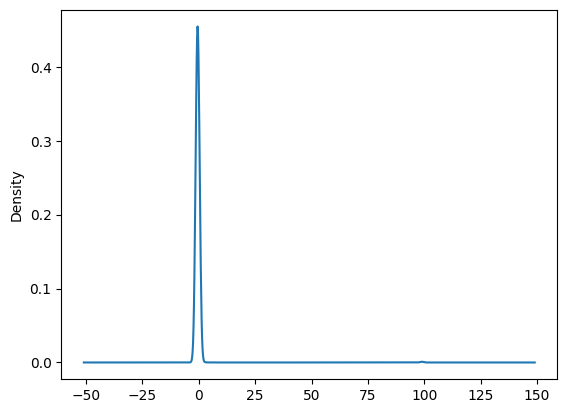

In [65]:
failed_prediction['prec_prediction_error'] = failed_prediction.prediction_error/failed_prediction.itemprice
failed_prediction['prec_prediction_error'].plot(kind="kde")

In [69]:
failed_prediction.groupby("chainid")['prec_prediction_error'].mean()

chainid
7290027600007   -0.468775
7290058140886   -0.965667
7290058173198   -0.038154
7290058197699   -0.055549
7290058198450   -0.029916
7290639000004   -0.411657
7290803800003   -0.960625
7290873255550   -0.024836
7290875100001   -0.224640
Name: prec_prediction_error, dtype: float64

In [ ]:
prediction_fail = (failed_prediction.itemprice - failed_prediction['predicted_price'])
prediction_fail.plot(kind='kde')

In [ ]:
failed_prediction[(np.abs(prediction_fail) > 0.5 ) & (np.abs(prediction_fail) < 100)].iloc[1]